# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:55:44 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=859562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=106278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=331201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=987504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

18:55:45 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=582328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=713462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:55:47 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=287366;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=185765;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

18:55:48 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=652771;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=802934;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

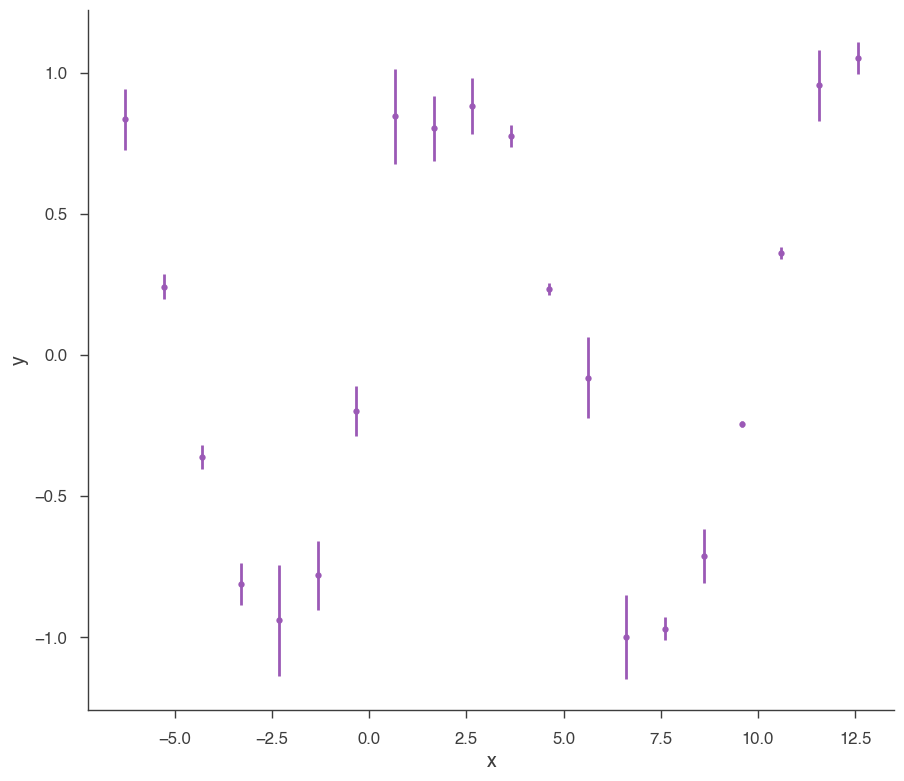

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=399966;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=93714;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:55:53 INFO      Mean acceptance fraction: 0.7163                                            ]8;id=429794;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=961507;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

18:55:54 INFO      fit restored to maximum of posterior                                         ]8;id=900592;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=984044;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=876688;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=564488;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K           (9.96 +/- 0.19) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0018 -0.0017 +0.0015) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.201525
total       -11.201525

Values of statistical measures:

statistical measures
AIC              27.108933
BIC              28.394515
DIC              26.296065
PDIC              1.945713

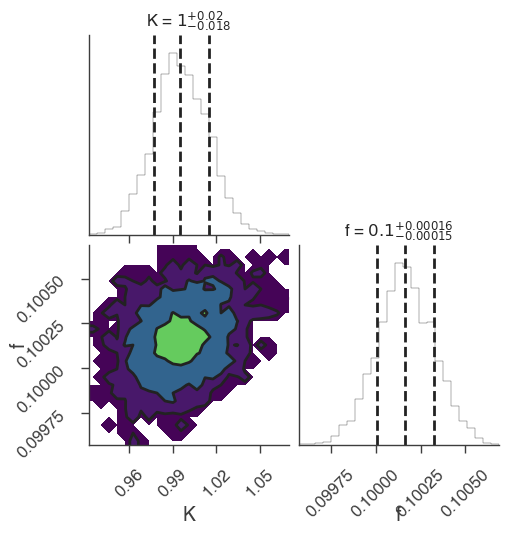

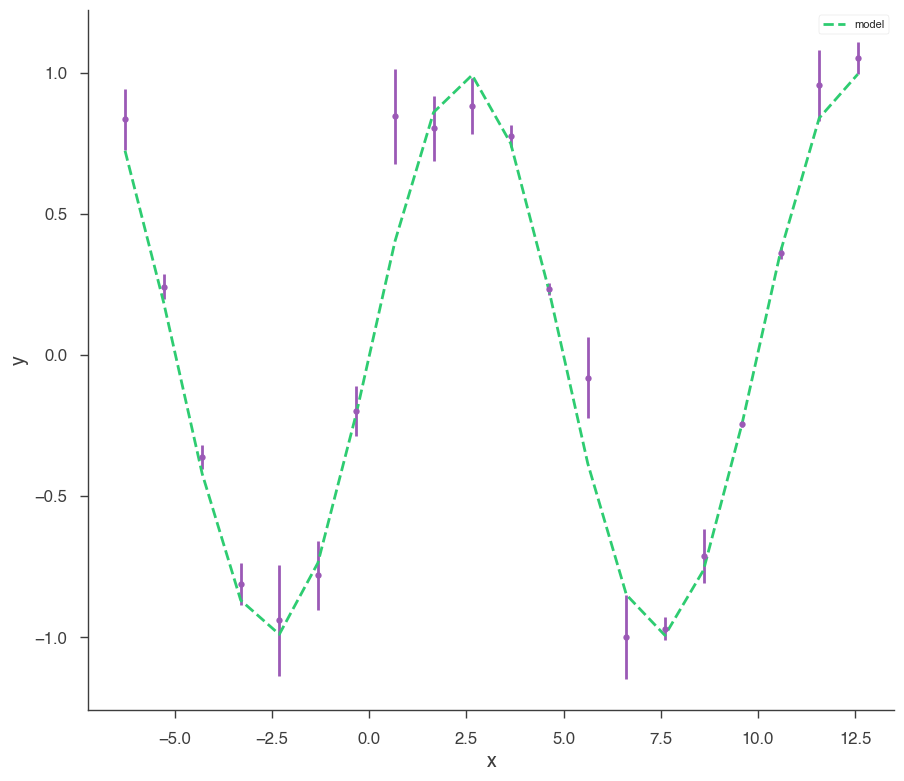

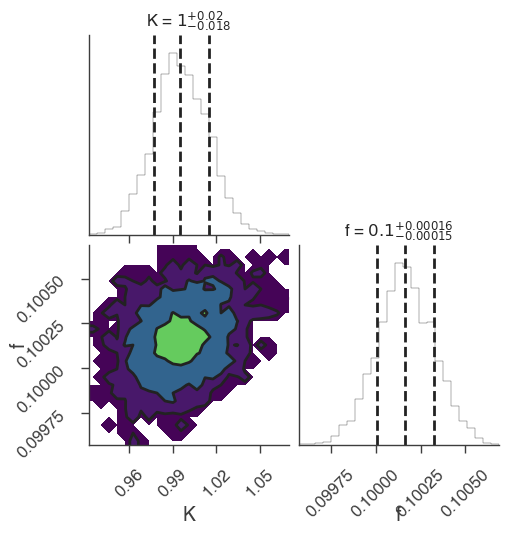

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

18:55:55 INFO      sampler set to multinest                                                ]8;id=573701;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=938475;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -21.607348677595773      +/-  0.15332382611014703     
 Total Likelihood Evaluations:         6746
 Sampling finished. Exiting MultiNest



18:55:57 INFO      fit restored to maximum of posterior                                         ]8;id=315093;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=125240;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=788807;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=95970;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                             
demo.spectrum.main.Sin.K   (9.96 -0.18 +0.21) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0017 +/- 0.0016) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.202375
total       -11.202375

Values of statistical measures:

statistical measures
AIC                27.110632
BIC                28.396214
DIC                26.296817
PDIC                1.946772
log(Z)             -9.383952

         INFO      deleting the chain directory chains                                     ]8;id=509297;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=622273;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

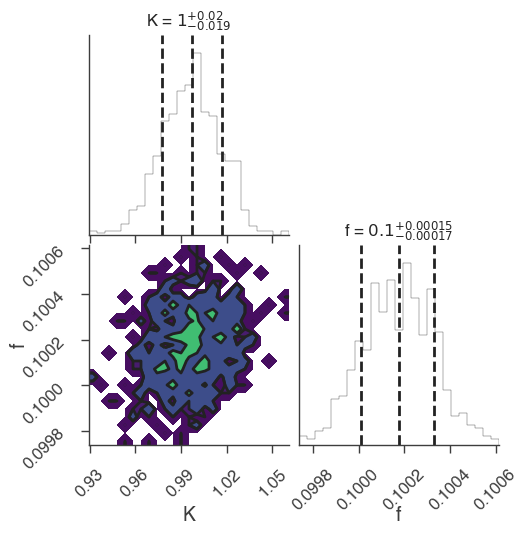

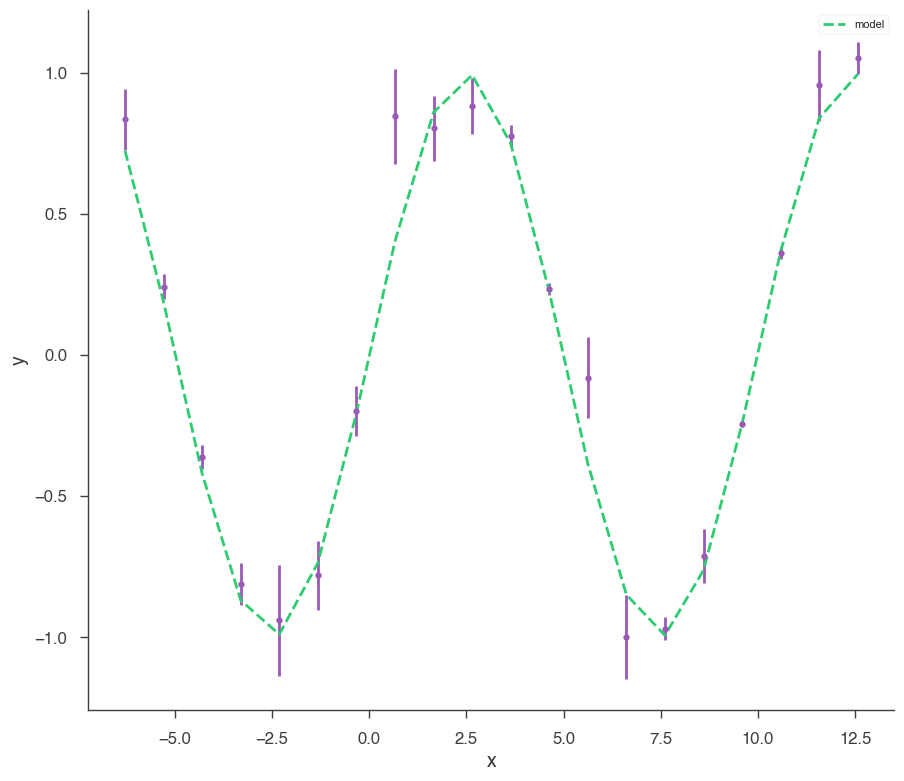

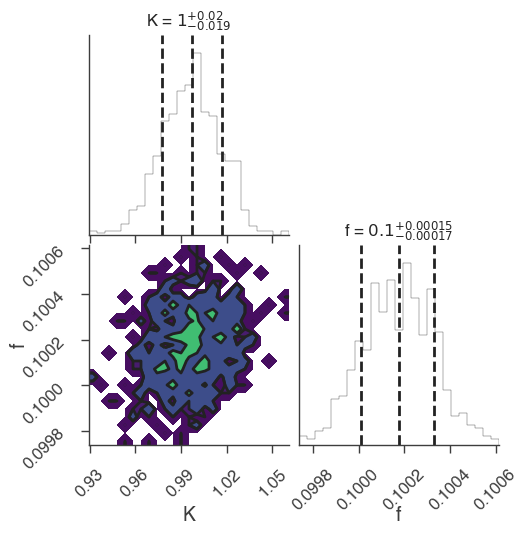

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

18:55:58 INFO      sampler set to dynesty_nested                                           ]8;id=973572;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=266123;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

131it [00:00, 1305.48it/s, bound: 0 | nc: 1 | ncall: 552 | eff(%): 23.732 | loglstar:   -inf < -5962.171 <    inf | logz: -5968.420 +/-  0.122 | dlogz: 5953.056 >  0.409]

262it [00:00, 1129.77it/s, bound: 0 | nc: 4 | ncall: 768 | eff(%): 34.115 | loglstar:   -inf < -4236.527 <    inf | logz: -4243.864 +/-  0.135 | dlogz: 4233.848 >  0.409]

377it [00:00, 975.17it/s, bound: 0 | nc: 1 | ncall: 1022 | eff(%): 36.888 | loglstar:   -inf < -3484.733 <    inf | logz: -3492.359 +/-  0.138 | dlogz: 3494.818 >  0.409]

477it [00:00, 855.65it/s, bound: 0 | nc: 1 | ncall: 1302 | eff(%): 36.636 | loglstar:   -inf < -2982.723 <    inf | logz: -2990.595 +/-  0.140 | dlogz: 2979.408 >  0.409]

565it [00:00, 709.86it/s, bound: 0 | nc: 1 | ncall: 1654 | eff(%): 34.160 | loglstar:   -inf < -2573.885 <    inf | logz: -2581.976 +/-  0.142 | dlogz: 2570.194 >  0.409]

640it [00:00, 607.51it/s, bound: 0 | nc: 11 | ncall: 2017 | eff(%): 31.730 | loglstar:   -inf < -2356.329 <    inf | logz: -2363.774 +/-  0.128 | dlogz: 2346.666 >  0.409]

705it [00:01, 524.86it/s, bound: 0 | nc: 1 | ncall: 2390 | eff(%): 29.498 | loglstar:   -inf < -2174.845 <    inf | logz: -2183.218 +/-  0.142 | dlogz: 2168.340 >  0.409] 

761it [00:01, 478.03it/s, bound: 0 | nc: 7 | ncall: 2713 | eff(%): 28.050 | loglstar:   -inf < -2040.416 <    inf | logz: -2048.598 +/-  0.137 | dlogz: 2031.958 >  0.409]

811it [00:01, 418.90it/s, bound: 0 | nc: 6 | ncall: 3087 | eff(%): 26.271 | loglstar:   -inf < -1981.430 <    inf | logz: -1989.108 +/-  0.132 | dlogz: 1971.502 >  0.409]

855it [00:01, 364.60it/s, bound: 0 | nc: 6 | ncall: 3541 | eff(%): 24.146 | loglstar:   -inf < -1928.277 <    inf | logz: -1935.939 +/-  0.133 | dlogz: 1918.131 >  0.409]

893it [00:01, 326.82it/s, bound: 0 | nc: 2 | ncall: 3904 | eff(%): 22.874 | loglstar:   -inf < -1886.157 <    inf | logz: -1894.257 +/-  0.133 | dlogz: 1879.402 >  0.409]

927it [00:01, 308.01it/s, bound: 0 | nc: 18 | ncall: 4204 | eff(%): 22.050 | loglstar:   -inf < -1833.184 <    inf | logz: -1842.165 +/-  0.149 | dlogz: 1830.677 >  0.409]

959it [00:02, 244.94it/s, bound: 0 | nc: 5 | ncall: 4720 | eff(%): 20.318 | loglstar:   -inf < -1795.821 <    inf | logz: -1803.773 +/-  0.135 | dlogz: 1788.679 >  0.409] 

985it [00:02, 231.45it/s, bound: 0 | nc: 21 | ncall: 5033 | eff(%): 19.571 | loglstar:   -inf < -1762.955 <    inf | logz: -1771.448 +/-  0.142 | dlogz: 1756.961 >  0.409]

1009it [00:02, 228.95it/s, bound: 0 | nc: 4 | ncall: 5283 | eff(%): 19.099 | loglstar:   -inf < -1718.994 <    inf | logz: -1726.999 +/-  0.136 | dlogz: 1711.719 >  0.409]

1033it [00:02, 210.13it/s, bound: 0 | nc: 7 | ncall: 5622 | eff(%): 18.374 | loglstar:   -inf < -1687.917 <    inf | logz: -1696.737 +/-  0.143 | dlogz: 1682.255 >  0.409]

1055it [00:02, 189.58it/s, bound: 0 | nc: 10 | ncall: 5979 | eff(%): 17.645 | loglstar:   -inf < -1645.110 <    inf | logz: -1654.165 +/-  0.144 | dlogz: 1639.763 >  0.409]

1077it [00:02, 195.07it/s, bound: 0 | nc: 21 | ncall: 6215 | eff(%): 17.329 | loglstar:   -inf < -1612.709 <    inf | logz: -1622.061 +/-  0.152 | dlogz: 1610.124 >  0.409]

1097it [00:02, 188.58it/s, bound: 0 | nc: 1 | ncall: 6485 | eff(%): 16.916 | loglstar:   -inf < -1583.972 <    inf | logz: -1592.719 +/-  0.144 | dlogz: 1577.908 >  0.409] 

1117it [00:02, 167.06it/s, bound: 0 | nc: 26 | ncall: 6860 | eff(%): 16.283 | loglstar:   -inf < -1548.013 <    inf | logz: -1557.164 +/-  0.145 | dlogz: 1542.581 >  0.409]

1135it [00:03, 152.65it/s, bound: 0 | nc: 19 | ncall: 7208 | eff(%): 15.746 | loglstar:   -inf < -1526.511 <    inf | logz: -1535.709 +/-  0.145 | dlogz: 1521.165 >  0.409]

1151it [00:03, 139.66it/s, bound: 0 | nc: 4 | ncall: 7552 | eff(%): 15.241 | loglstar:   -inf < -1506.458 <    inf | logz: -1515.518 +/-  0.143 | dlogz: 1500.575 >  0.409] 

1166it [00:03, 118.86it/s, bound: 0 | nc: 1 | ncall: 7992 | eff(%): 14.590 | loglstar:   -inf < -1488.100 <    inf | logz: -1497.025 +/-  0.142 | dlogz: 1481.764 >  0.409]

1184it [00:03, 131.31it/s, bound: 0 | nc: 8 | ncall: 8230 | eff(%): 14.386 | loglstar:   -inf < -1470.365 <    inf | logz: -1479.038 +/-  0.139 | dlogz: 1463.328 >  0.409]

1198it [00:03, 120.79it/s, bound: 0 | nc: 29 | ncall: 8559 | eff(%): 13.997 | loglstar:   -inf < -1451.615 <    inf | logz: -1461.231 +/-  0.153 | dlogz: 1448.187 >  0.409]

1218it [00:03, 138.82it/s, bound: 0 | nc: 16 | ncall: 8785 | eff(%): 13.865 | loglstar:   -inf < -1432.884 <    inf | logz: -1441.729 +/-  0.141 | dlogz: 1426.094 >  0.409]

1233it [00:03, 140.55it/s, bound: 0 | nc: 35 | ncall: 9022 | eff(%): 13.667 | loglstar:   -inf < -1417.799 <    inf | logz: -1427.523 +/-  0.154 | dlogz: 1414.525 >  0.409]

1248it [00:03, 141.12it/s, bound: 0 | nc: 5 | ncall: 9265 | eff(%): 13.470 | loglstar:   -inf < -1401.685 <    inf | logz: -1410.709 +/-  0.145 | dlogz: 1395.338 >  0.409] 

1263it [00:04, 141.41it/s, bound: 0 | nc: 4 | ncall: 9512 | eff(%): 13.278 | loglstar:   -inf < -1375.125 <    inf | logz: -1384.826 +/-  0.153 | dlogz: 1370.963 >  0.409]

1278it [00:04, 108.70it/s, bound: 0 | nc: 48 | ncall: 10032 | eff(%): 12.739 | loglstar:   -inf < -1354.188 <    inf | logz: -1363.558 +/-  0.148 | dlogz: 1348.505 >  0.409]

1291it [00:04, 112.66it/s, bound: 0 | nc: 18 | ncall: 10276 | eff(%): 12.563 | loglstar:   -inf < -1339.087 <    inf | logz: -1348.718 +/-  0.149 | dlogz: 1333.826 >  0.409]

1305it [00:04, 112.66it/s, bound: 0 | nc: 76 | ncall: 10567 | eff(%): 12.350 | loglstar:   -inf < -1318.918 <    inf | logz: -1327.886 +/-  0.142 | dlogz: 1311.911 >  0.409]

1317it [00:04, 104.27it/s, bound: 0 | nc: 3 | ncall: 10900 | eff(%): 12.083 | loglstar:   -inf < -1291.265 <    inf | logz: -1300.039 +/-  0.145 | dlogz: 1284.217 >  0.409] 

1330it [00:04, 109.28it/s, bound: 0 | nc: 68 | ncall: 11144 | eff(%): 11.935 | loglstar:   -inf < -1238.763 <    inf | logz: -1248.062 +/-  0.146 | dlogz: 1232.408 >  0.409]

1342it [00:04, 90.87it/s, bound: 0 | nc: 21 | ncall: 11600 | eff(%): 11.569 | loglstar:   -inf < -1186.381 <    inf | logz: -1196.274 +/-  0.154 | dlogz: 1182.156 >  0.409] 

1352it [00:05, 89.81it/s, bound: 0 | nc: 38 | ncall: 11879 | eff(%): 11.381 | loglstar:   -inf < -1113.605 <    inf | logz: -1123.124 +/-  0.151 | dlogz: 1107.882 >  0.409]

1362it [00:05, 81.38it/s, bound: 0 | nc: 40 | ncall: 12254 | eff(%): 11.115 | loglstar:   -inf < -1081.500 <    inf | logz: -1091.563 +/-  0.158 | dlogz: 1079.257 >  0.409]

1375it [00:05, 92.13it/s, bound: 0 | nc: 10 | ncall: 12495 | eff(%): 11.004 | loglstar:   -inf < -1033.063 <    inf | logz: -1042.669 +/-  0.151 | dlogz: 1027.413 >  0.409]

1385it [00:05, 93.54it/s, bound: 0 | nc: 5 | ncall: 12735 | eff(%): 10.876 | loglstar:   -inf < -1005.236 <    inf | logz: -1015.375 +/-  0.159 | dlogz: 1004.464 >  0.409] 

1398it [00:05, 102.80it/s, bound: 0 | nc: 34 | ncall: 12973 | eff(%): 10.776 | loglstar:   -inf < -956.822 <    inf | logz: -966.897 +/-  0.156 | dlogz: 952.986 >  0.409] 

1409it [00:05, 89.69it/s, bound: 0 | nc: 3 | ncall: 13361 | eff(%): 10.546 | loglstar:   -inf < -923.996 <    inf | logz: -933.939 +/-  0.154 | dlogz: 919.160 >  0.409]  

1419it [00:05, 81.66it/s, bound: 0 | nc: 37 | ncall: 13725 | eff(%): 10.339 | loglstar:   -inf < -869.253 <    inf | logz: -878.630 +/-  0.147 | dlogz: 862.550 >  0.409]

1428it [00:06, 73.92it/s, bound: 0 | nc: 54 | ncall: 14099 | eff(%): 10.128 | loglstar:   -inf < -835.480 <    inf | logz: -845.730 +/-  0.160 | dlogz: 837.495 >  0.409]

1436it [00:06, 49.43it/s, bound: 1 | nc: 1 | ncall: 14373 | eff(%):  9.991 | loglstar:   -inf < -818.844 <    inf | logz: -828.236 +/-  0.150 | dlogz: 812.407 >  0.409] 

1520it [00:06, 190.61it/s, bound: 1 | nc: 1 | ncall: 14501 | eff(%): 10.482 | loglstar:   -inf < -605.278 <    inf | logz: -614.901 +/-  0.147 | dlogz: 598.517 >  0.409]

1598it [00:06, 309.68it/s, bound: 1 | nc: 2 | ncall: 14637 | eff(%): 10.918 | loglstar:   -inf < -449.889 <    inf | logz: -459.460 +/-  0.150 | dlogz: 443.097 >  0.409]

1670it [00:06, 401.12it/s, bound: 1 | nc: 2 | ncall: 14771 | eff(%): 11.306 | loglstar:   -inf < -392.204 <    inf | logz: -402.585 +/-  0.153 | dlogz: 386.448 >  0.409]

1731it [00:06, 449.34it/s, bound: 1 | nc: 4 | ncall: 14910 | eff(%): 11.610 | loglstar:   -inf < -340.091 <    inf | logz: -350.577 +/-  0.156 | dlogz: 335.734 >  0.409]

1786it [00:07, 333.27it/s, bound: 2 | nc: 1 | ncall: 15011 | eff(%): 11.898 | loglstar:   -inf < -308.818 <    inf | logz: -318.672 +/-  0.148 | dlogz: 303.466 >  0.409]

1881it [00:07, 458.90it/s, bound: 2 | nc: 1 | ncall: 15164 | eff(%): 12.404 | loglstar:   -inf < -244.820 <    inf | logz: -254.919 +/-  0.153 | dlogz: 239.698 >  0.409]

1967it [00:07, 548.85it/s, bound: 2 | nc: 3 | ncall: 15327 | eff(%): 12.834 | loglstar:   -inf < -213.087 <    inf | logz: -222.413 +/-  0.146 | dlogz: 206.516 >  0.409]

2042it [00:07, 595.25it/s, bound: 2 | nc: 5 | ncall: 15508 | eff(%): 13.167 | loglstar:   -inf < -182.080 <    inf | logz: -191.528 +/-  0.149 | dlogz: 175.439 >  0.409]

2112it [00:07, 456.08it/s, bound: 3 | nc: 1 | ncall: 15633 | eff(%): 13.510 | loglstar:   -inf < -155.440 <    inf | logz: -165.694 +/-  0.153 | dlogz: 149.607 >  0.409]

2216it [00:07, 579.00it/s, bound: 3 | nc: 3 | ncall: 15789 | eff(%): 14.035 | loglstar:   -inf < -122.518 <    inf | logz: -132.251 +/-  0.149 | dlogz: 115.688 >  0.409]

2297it [00:07, 631.84it/s, bound: 3 | nc: 3 | ncall: 15954 | eff(%): 14.398 | loglstar:   -inf < -102.136 <    inf | logz: -112.281 +/-  0.154 | dlogz: 95.569 >  0.409] 

2371it [00:07, 621.28it/s, bound: 3 | nc: 7 | ncall: 16172 | eff(%): 14.661 | loglstar:   -inf < -87.965 <    inf | logz: -98.393 +/-  0.151 | dlogz: 81.470 >  0.409]  

2441it [00:08, 492.49it/s, bound: 4 | nc: 1 | ncall: 16250 | eff(%): 15.022 | loglstar:   -inf < -74.633 <    inf | logz: -85.088 +/-  0.152 | dlogz: 67.961 >  0.409]

2545it [00:08, 608.78it/s, bound: 4 | nc: 3 | ncall: 16401 | eff(%): 15.517 | loglstar:   -inf < -59.201 <    inf | logz: -69.452 +/-  0.151 | dlogz: 52.023 >  0.409]

2622it [00:08, 645.55it/s, bound: 4 | nc: 1 | ncall: 16571 | eff(%): 15.823 | loglstar:   -inf < -50.050 <    inf | logz: -60.331 +/-  0.152 | dlogz: 42.687 >  0.409]

2699it [00:08, 666.87it/s, bound: 4 | nc: 12 | ncall: 16752 | eff(%): 16.112 | loglstar:   -inf < -42.889 <    inf | logz: -53.087 +/-  0.151 | dlogz: 35.221 >  0.409]

2772it [00:08, 493.34it/s, bound: 5 | nc: 1 | ncall: 16852 | eff(%): 16.449 | loglstar:   -inf < -37.464 <    inf | logz: -47.617 +/-  0.153 | dlogz: 29.557 >  0.409] 

2873it [00:08, 602.54it/s, bound: 5 | nc: 1 | ncall: 17003 | eff(%): 16.897 | loglstar:   -inf < -31.424 <    inf | logz: -41.557 +/-  0.152 | dlogz: 23.230 >  0.409]

2955it [00:08, 651.48it/s, bound: 5 | nc: 2 | ncall: 17165 | eff(%): 17.215 | loglstar:   -inf < -28.200 <    inf | logz: -38.091 +/-  0.150 | dlogz: 19.541 >  0.409]

3030it [00:08, 671.74it/s, bound: 5 | nc: 1 | ncall: 17336 | eff(%): 17.478 | loglstar:   -inf < -25.334 <    inf | logz: -35.457 +/-  0.151 | dlogz: 16.720 >  0.409]

3105it [00:09, 498.43it/s, bound: 6 | nc: 2 | ncall: 17450 | eff(%): 17.794 | loglstar:   -inf < -22.831 <    inf | logz: -33.109 +/-  0.152 | dlogz: 14.183 >  0.409]

3211it [00:09, 616.85it/s, bound: 6 | nc: 1 | ncall: 17599 | eff(%): 18.245 | loglstar:   -inf < -20.213 <    inf | logz: -30.362 +/-  0.152 | dlogz: 11.163 >  0.409]

3310it [00:09, 701.36it/s, bound: 6 | nc: 7 | ncall: 17777 | eff(%): 18.620 | loglstar:   -inf < -18.343 <    inf | logz: -28.498 +/-  0.151 | dlogz:  9.047 >  0.409]

3414it [00:09, 545.86it/s, bound: 7 | nc: 2 | ncall: 17988 | eff(%): 18.979 | loglstar:   -inf < -16.681 <    inf | logz: -26.897 +/-  0.152 | dlogz:  7.184 >  0.409]

3530it [00:09, 666.78it/s, bound: 7 | nc: 1 | ncall: 18130 | eff(%): 19.470 | loglstar:   -inf < -15.411 <    inf | logz: -25.594 +/-  0.151 | dlogz:  5.590 >  0.409]

3651it [00:09, 784.40it/s, bound: 7 | nc: 3 | ncall: 18333 | eff(%): 19.915 | loglstar:   -inf < -14.418 <    inf | logz: -24.589 +/-  0.151 | dlogz:  4.290 >  0.409]

3745it [00:10, 783.40it/s, bound: 7 | nc: 1 | ncall: 18541 | eff(%): 20.198 | loglstar:   -inf < -13.771 <    inf | logz: -23.975 +/-  0.151 | dlogz:  3.459 >  0.409]

3834it [00:10, 599.42it/s, bound: 8 | nc: 1 | ncall: 18678 | eff(%): 20.527 | loglstar:   -inf < -13.314 <    inf | logz: -23.506 +/-  0.151 | dlogz:  2.797 >  0.409]

3940it [00:10, 694.10it/s, bound: 8 | nc: 3 | ncall: 18827 | eff(%): 20.927 | loglstar:   -inf < -12.872 <    inf | logz: -23.075 +/-  0.151 | dlogz:  2.160 >  0.409]

4033it [00:10, 746.34it/s, bound: 8 | nc: 5 | ncall: 18982 | eff(%): 21.246 | loglstar:   -inf < -12.542 <    inf | logz: -22.773 +/-  0.152 | dlogz:  1.703 >  0.409]

4119it [00:10, 748.48it/s, bound: 8 | nc: 3 | ncall: 19174 | eff(%): 21.482 | loglstar:   -inf < -12.266 <    inf | logz: -22.542 +/-  0.152 | dlogz:  1.355 >  0.409]

4202it [00:10, 534.40it/s, bound: 9 | nc: 1 | ncall: 19294 | eff(%): 21.779 | loglstar:   -inf < -12.024 <    inf | logz: -22.349 +/-  0.152 | dlogz:  1.074 >  0.409]

4307it [00:10, 635.89it/s, bound: 9 | nc: 4 | ncall: 19449 | eff(%): 22.145 | loglstar:   -inf < -11.811 <    inf | logz: -22.153 +/-  0.152 | dlogz:  0.797 >  0.409]

4386it [00:11, 668.97it/s, bound: 9 | nc: 2 | ncall: 19614 | eff(%): 22.362 | loglstar:   -inf < -11.694 <    inf | logz: -22.034 +/-  0.152 | dlogz:  0.635 >  0.409]

4465it [00:11, 477.46it/s, bound: 10 | nc: 2 | ncall: 19797 | eff(%): 22.554 | loglstar:   -inf < -11.609 <    inf | logz: -21.938 +/-  0.152 | dlogz:  0.508 >  0.409]

4542it [00:11, 533.01it/s, +173 | bound: 10 | nc: 1 | ncall: 20070 | eff(%): 23.697 | loglstar:   -inf < -11.395 <    inf | logz: -21.706 +/-  0.152 | dlogz:  0.219 >  0.409]

4542it [00:11, 395.01it/s, +400 | bound: 10 | nc: 1 | ncall: 20297 | eff(%): 24.838 | loglstar:   -inf < -11.206 <    inf | logz: -21.506 +/-  0.153 | dlogz:  0.001 >  0.409]

18:56:10 INFO      fit restored to maximum of posterior                                         ]8;id=805946;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=283914;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=526745;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=928588;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.96 -0.20 +0.18) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0018 -0.0016 +0.0015) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.201596
total       -11.201596

Values of statistical measures:

statistical measures
AIC                27.109074
BIC                28.394657
DIC                26.472808
PDIC                2.033950
log(Z)             -9.339933

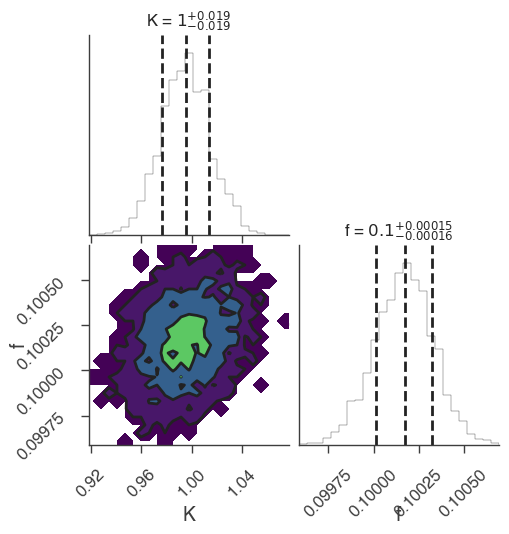

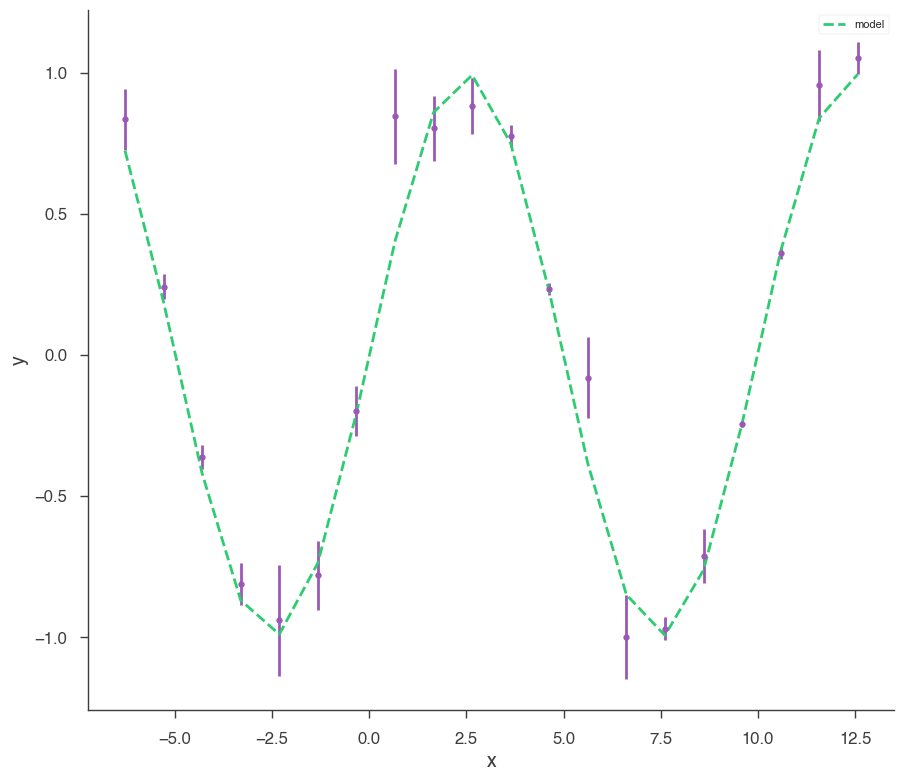

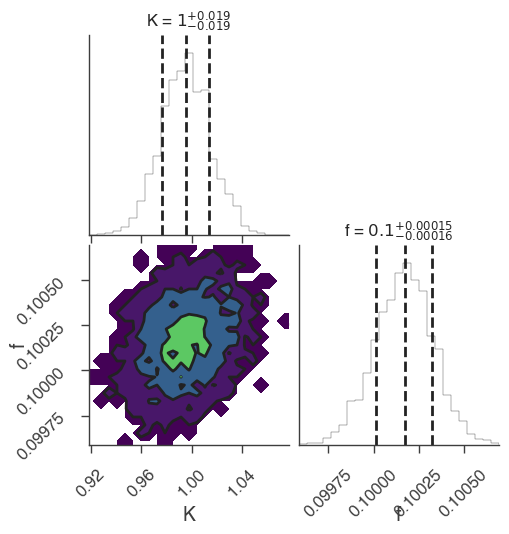

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=290720;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=443100;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

61it [00:00, 605.27it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 64 | eff(%): 10.816 | loglstar:   -inf < -9392.184 <    inf | logz: -9399.214 +/-  0.119 | dlogz: 9416.888 >  0.010]

182it [00:00, 953.14it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 222 | eff(%): 25.208 | loglstar:   -inf < -5940.011 <    inf | logz: -5947.281 +/-  0.120 | dlogz: 5896.791 >  0.010]

282it [00:00, 967.60it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 391 | eff(%): 31.650 | loglstar:   -inf < -4743.952 <    inf | logz: -4751.317 +/-  0.119 | dlogz: 4695.765 >  0.010]

379it [00:00, 935.67it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 582 | eff(%): 35.028 | loglstar:   -inf < -3963.927 <    inf | logz: -3971.592 +/-  0.124 | dlogz: 3945.044 >  0.010]

473it [00:00, 908.69it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 774 | eff(%): 37.127 | loglstar:   -inf < -3487.501 <    inf | logz: -3495.282 +/-  0.123 | dlogz: 3439.709 >  0.010]

565it [00:00, 799.86it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1056 | eff(%): 36.311 | loglstar:   -inf < -3191.231 <    inf | logz: -3198.818 +/-  0.119 | dlogz: 3141.418 >  0.010]

647it [00:00, 737.71it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1312 | eff(%): 35.706 | loglstar:   -inf < -2868.050 <    inf | logz: -2876.067 +/-  0.123 | dlogz: 2842.422 >  0.010]

723it [00:00, 647.74it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1626 | eff(%): 34.008 | loglstar:   -inf < -2657.871 <    inf | logz: -2665.924 +/-  0.122 | dlogz: 2631.760 >  0.010]

791it [00:01, 599.15it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1903 | eff(%): 32.917 | loglstar:   -inf < -2498.815 <    inf | logz: -2507.079 +/-  0.124 | dlogz: 2489.498 >  0.010]

853it [00:01, 542.65it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 2215 | eff(%): 31.418 | loglstar:   -inf < -2334.511 <    inf | logz: -2343.042 +/-  0.128 | dlogz: 2326.152 >  0.010]

909it [00:01, 481.05it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2554 | eff(%): 29.764 | loglstar:   -inf < -2221.062 <    inf | logz: -2229.713 +/-  0.129 | dlogz: 2212.974 >  0.010]

959it [00:01, 439.94it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2870 | eff(%): 28.457 | loglstar:   -inf < -2153.600 <    inf | logz: -2162.121 +/-  0.124 | dlogz: 2143.867 >  0.010]

1005it [00:01, 411.17it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3161 | eff(%): 27.452 | loglstar:   -inf < -2081.343 <    inf | logz: -2089.119 +/-  0.120 | dlogz: 2069.730 >  0.010]

1047it [00:01, 383.82it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 3457 | eff(%): 26.459 | loglstar:   -inf < -2014.758 <    inf | logz: -2023.587 +/-  0.128 | dlogz: 2005.497 >  0.010]

1086it [00:01, 356.13it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3755 | eff(%): 25.523 | loglstar:   -inf < -1958.343 <    inf | logz: -1965.818 +/-  0.116 | dlogz: 1945.994 >  0.010]

1122it [00:02, 347.82it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3999 | eff(%): 24.939 | loglstar:   -inf < -1914.953 <    inf | logz: -1923.144 +/-  0.123 | dlogz: 1903.796 >  0.010]

1158it [00:02, 343.64it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 4238 | eff(%): 24.441 | loglstar:   -inf < -1862.231 <    inf | logz: -1871.332 +/-  0.131 | dlogz: 1853.417 >  0.010]

1193it [00:02, 297.02it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 4604 | eff(%): 23.374 | loglstar:   -inf < -1831.050 <    inf | logz: -1840.230 +/-  0.132 | dlogz: 1822.379 >  0.010]

1224it [00:02, 252.30it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 5020 | eff(%): 22.174 | loglstar:   -inf < -1806.752 <    inf | logz: -1815.214 +/-  0.125 | dlogz: 1795.754 >  0.010] 

1251it [00:02, 232.98it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 5353 | eff(%): 21.374 | loglstar:   -inf < -1769.534 <    inf | logz: -1778.921 +/-  0.136 | dlogz: 1762.496 >  0.010]

1276it [00:02, 206.18it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 5737 | eff(%): 20.459 | loglstar:   -inf < -1736.529 <    inf | logz: -1744.986 +/-  0.120 | dlogz: 1724.981 >  0.010]

1298it [00:02, 201.55it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 6004 | eff(%): 19.957 | loglstar:   -inf < -1709.429 <    inf | logz: -1718.103 +/-  0.128 | dlogz: 1698.581 >  0.010] 

1319it [00:03, 158.63it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6506 | eff(%): 18.827 | loglstar:   -inf < -1684.421 <    inf | logz: -1692.943 +/-  0.126 | dlogz: 1673.200 >  0.010]

1340it [00:03, 164.07it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 6770 | eff(%): 18.432 | loglstar:   -inf < -1649.976 <    inf | logz: -1658.678 +/-  0.128 | dlogz: 1639.069 >  0.010]

1358it [00:03, 166.88it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7004 | eff(%): 18.097 | loglstar:   -inf < -1633.078 <    inf | logz: -1642.461 +/-  0.131 | dlogz: 1623.535 >  0.010] 

1382it [00:03, 183.30it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 7235 | eff(%): 17.867 | loglstar:   -inf < -1608.485 <    inf | logz: -1617.634 +/-  0.127 | dlogz: 1598.010 >  0.010]

1402it [00:03, 166.85it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 7585 | eff(%): 17.341 | loglstar:   -inf < -1579.805 <    inf | logz: -1589.470 +/-  0.138 | dlogz: 1572.361 >  0.010] 

1420it [00:03, 155.81it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7908 | eff(%): 16.889 | loglstar:   -inf < -1565.145 <    inf | logz: -1573.344 +/-  0.124 | dlogz: 1553.051 >  0.010]

1437it [00:03, 147.87it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 8212 | eff(%): 16.494 | loglstar:   -inf < -1549.202 <    inf | logz: -1557.590 +/-  0.124 | dlogz: 1537.306 >  0.010]

1453it [00:04, 142.82it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 8499 | eff(%): 16.146 | loglstar:   -inf < -1535.766 <    inf | logz: -1545.020 +/-  0.130 | dlogz: 1525.439 >  0.010] 

1472it [00:04, 154.03it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 8733 | eff(%): 15.943 | loglstar:   -inf < -1519.498 <    inf | logz: -1529.293 +/-  0.138 | dlogz: 1511.687 >  0.010]

1488it [00:04, 152.31it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 8983 | eff(%): 15.691 | loglstar:   -inf < -1497.907 <    inf | logz: -1507.366 +/-  0.131 | dlogz: 1487.846 >  0.010] 

1506it [00:04, 150.33it/s, batch: 0 | bound: 0 | nc: 59 | ncall: 9264 | eff(%): 15.424 | loglstar:   -inf < -1485.152 <    inf | logz: -1494.447 +/-  0.129 | dlogz: 1474.527 >  0.010]

1522it [00:04, 135.58it/s, batch: 0 | bound: 0 | nc: 90 | ncall: 9613 | eff(%): 15.050 | loglstar:   -inf < -1464.700 <    inf | logz: -1473.276 +/-  0.127 | dlogz: 1452.945 >  0.010]

1536it [00:04, 120.77it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 9980 | eff(%): 14.656 | loglstar:   -inf < -1458.253 <    inf | logz: -1466.589 +/-  0.123 | dlogz: 1445.985 >  0.010]

1549it [00:04, 120.36it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 10228 | eff(%): 14.439 | loglstar:   -inf < -1449.324 <    inf | logz: -1458.013 +/-  0.125 | dlogz: 1437.574 >  0.010]

1562it [00:04, 108.25it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 10585 | eff(%): 14.091 | loglstar:   -inf < -1433.091 <    inf | logz: -1441.581 +/-  0.127 | dlogz: 1420.953 >  0.010]

1574it [00:05, 108.86it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 10839 | eff(%): 13.881 | loglstar:   -inf < -1424.354 <    inf | logz: -1433.259 +/-  0.128 | dlogz: 1412.894 >  0.010]

1586it [00:05, 106.21it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 11121 | eff(%): 13.648 | loglstar:   -inf < -1406.149 <    inf | logz: -1415.413 +/-  0.130 | dlogz: 1395.232 >  0.010] 

1598it [00:05, 109.05it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 11365 | eff(%): 13.468 | loglstar:   -inf < -1393.492 <    inf | logz: -1402.541 +/-  0.128 | dlogz: 1382.020 >  0.010]

1610it [00:05, 98.19it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11733 | eff(%): 13.161 | loglstar:   -inf < -1376.113 <    inf | logz: -1384.821 +/-  0.129 | dlogz: 1364.236 >  0.010]  

1627it [00:05, 115.67it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 12024 | eff(%): 12.991 | loglstar:   -inf < -1346.260 <    inf | logz: -1355.190 +/-  0.131 | dlogz: 1334.698 >  0.010]

1640it [00:05, 115.41it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 12292 | eff(%): 12.821 | loglstar:   -inf < -1322.789 <    inf | logz: -1332.909 +/-  0.141 | dlogz: 1315.054 >  0.010]

1653it [00:05, 117.59it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 12604 | eff(%): 12.614 | loglstar:   -inf < -1304.613 <    inf | logz: -1313.751 +/-  0.135 | dlogz: 1293.569 >  0.010]

1666it [00:05, 109.89it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 12926 | eff(%): 12.409 | loglstar:   -inf < -1273.254 <    inf | logz: -1283.235 +/-  0.138 | dlogz: 1264.096 >  0.010] 

1678it [00:06, 84.87it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 13464 | eff(%): 12.017 | loglstar:   -inf < -1239.010 <    inf | logz: -1248.500 +/-  0.132 | dlogz: 1228.119 >  0.010]

1688it [00:06, 80.02it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 13809 | eff(%): 11.797 | loglstar:   -inf < -1214.720 <    inf | logz: -1224.859 +/-  0.139 | dlogz: 1205.993 >  0.010]

1697it [00:06, 81.81it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 14051 | eff(%): 11.662 | loglstar:   -inf < -1178.528 <    inf | logz: -1188.774 +/-  0.142 | dlogz: 1171.011 >  0.010]

1706it [00:06, 82.86it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 14298 | eff(%): 11.529 | loglstar:   -inf < -1155.685 <    inf | logz: -1165.498 +/-  0.137 | dlogz: 1145.712 >  0.010]

1716it [00:06, 86.82it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 14537 | eff(%): 11.412 | loglstar:   -inf < -1105.380 <    inf | logz: -1115.705 +/-  0.143 | dlogz: 1099.437 >  0.010]

1727it [00:06, 90.96it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 14792 | eff(%): 11.293 | loglstar:   -inf < -1072.202 <    inf | logz: -1082.429 +/-  0.140 | dlogz: 1065.637 >  0.010]

1738it [00:06, 95.92it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 15056 | eff(%): 11.173 | loglstar:   -inf < -1026.336 <    inf | logz: -1036.717 +/-  0.144 | dlogz: 1029.462 >  0.010] 

1748it [00:06, 89.93it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 15487 | eff(%): 10.934 | loglstar:   -inf < -991.309 <    inf | logz: -1000.641 +/-  0.132 | dlogz: 981.979 >  0.010] 

1758it [00:06, 84.67it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 15806 | eff(%): 10.781 | loglstar:   -inf < -958.551 <    inf | logz: -968.896 +/-  0.142 | dlogz: 952.724 >  0.010] 

1767it [00:07, 81.36it/s, batch: 0 | bound: 0 | nc: 84 | ncall: 16094 | eff(%): 10.648 | loglstar:   -inf < -910.102 <    inf | logz: -920.411 +/-  0.141 | dlogz: 903.731 >  0.010]

1777it [00:07, 85.17it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 16357 | eff(%): 10.542 | loglstar:   -inf < -887.258 <    inf | logz: -897.692 +/-  0.143 | dlogz: 882.314 >  0.010]

1786it [00:07, 76.38it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 16836 | eff(%): 10.302 | loglstar:   -inf < -870.171 <    inf | logz: -880.060 +/-  0.135 | dlogz: 861.694 >  0.010]

1796it [00:07, 82.31it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 17070 | eff(%): 10.222 | loglstar:   -inf < -838.356 <    inf | logz: -848.716 +/-  0.141 | dlogz: 831.734 >  0.010]

1805it [00:07, 78.72it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 17379 | eff(%): 10.096 | loglstar:   -inf < -828.084 <    inf | logz: -837.882 +/-  0.137 | dlogz: 819.683 >  0.010]

1814it [00:07, 51.36it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17617 | eff(%): 10.013 | loglstar:   -inf < -792.989 <    inf | logz: -803.299 +/-  0.141 | dlogz: 786.056 >  0.010] 

1905it [00:08, 214.57it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17737 | eff(%): 10.446 | loglstar:   -inf < -596.184 <    inf | logz: -606.038 +/-  0.138 | dlogz: 587.513 >  0.010]

1988it [00:08, 344.48it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17866 | eff(%): 10.824 | loglstar:   -inf < -468.607 <    inf | logz: -479.357 +/-  0.144 | dlogz: 462.208 >  0.010]

2062it [00:08, 435.61it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18015 | eff(%): 11.137 | loglstar:   -inf < -388.816 <    inf | logz: -398.976 +/-  0.138 | dlogz: 383.699 >  0.010]

2126it [00:08, 484.68it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 18151 | eff(%): 11.399 | loglstar:   -inf < -345.365 <    inf | logz: -355.480 +/-  0.138 | dlogz: 340.242 >  0.010]

2185it [00:08, 511.52it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18302 | eff(%): 11.621 | loglstar:   -inf < -318.827 <    inf | logz: -328.377 +/-  0.131 | dlogz: 312.419 >  0.010]

2243it [00:08, 353.14it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18406 | eff(%): 11.864 | loglstar:   -inf < -288.038 <    inf | logz: -297.413 +/-  0.131 | dlogz: 281.281 >  0.010]

2352it [00:08, 503.30it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18552 | eff(%): 12.345 | loglstar:   -inf < -238.592 <    inf | logz: -248.169 +/-  0.129 | dlogz: 231.857 >  0.010]

2442it [00:08, 592.19it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 18729 | eff(%): 12.700 | loglstar:   -inf < -206.939 <    inf | logz: -216.456 +/-  0.133 | dlogz: 199.974 >  0.010]

2547it [00:09, 703.56it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18926 | eff(%): 13.111 | loglstar:   -inf < -173.626 <    inf | logz: -183.599 +/-  0.133 | dlogz: 166.911 >  0.010]

2629it [00:09, 453.35it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19129 | eff(%): 13.393 | loglstar:   -inf < -144.556 <    inf | logz: -154.784 +/-  0.136 | dlogz: 137.973 >  0.010]

2738it [00:09, 571.55it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19271 | eff(%): 13.849 | loglstar:   -inf < -121.482 <    inf | logz: -131.461 +/-  0.134 | dlogz: 114.332 >  0.010]

2834it [00:09, 652.60it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19425 | eff(%): 14.223 | loglstar:   -inf < -100.604 <    inf | logz: -110.796 +/-  0.134 | dlogz: 93.642 >  0.010] 

2920it [00:09, 698.91it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19585 | eff(%): 14.538 | loglstar:   -inf < -85.202 <    inf | logz: -95.522 +/-  0.135 | dlogz: 78.526 >  0.010]  

3004it [00:09, 692.89it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19794 | eff(%): 14.802 | loglstar:   -inf < -75.528 <    inf | logz: -85.874 +/-  0.134 | dlogz: 68.692 >  0.010]

3084it [00:10, 475.51it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19917 | eff(%): 15.105 | loglstar:   -inf < -66.224 <    inf | logz: -76.285 +/-  0.135 | dlogz: 58.905 >  0.010]

3199it [00:10, 604.21it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20061 | eff(%): 15.559 | loglstar:   -inf < -55.298 <    inf | logz: -65.331 +/-  0.135 | dlogz: 47.697 >  0.010]

3288it [00:10, 664.75it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20215 | eff(%): 15.873 | loglstar:   -inf < -47.681 <    inf | logz: -58.097 +/-  0.136 | dlogz: 40.297 >  0.010]

3371it [00:10, 701.74it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20377 | eff(%): 16.147 | loglstar:   -inf < -42.524 <    inf | logz: -52.616 +/-  0.135 | dlogz: 34.617 >  0.010]

3453it [00:10, 724.97it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20548 | eff(%): 16.405 | loglstar:   -inf < -38.093 <    inf | logz: -48.055 +/-  0.135 | dlogz: 29.941 >  0.010]

3535it [00:10, 490.30it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20690 | eff(%): 16.682 | loglstar:   -inf < -33.889 <    inf | logz: -44.144 +/-  0.136 | dlogz: 25.872 >  0.010]

3644it [00:10, 607.99it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20834 | eff(%): 17.081 | loglstar:   -inf < -29.256 <    inf | logz: -39.509 +/-  0.136 | dlogz: 21.010 >  0.010]

3734it [00:10, 671.80it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20986 | eff(%): 17.379 | loglstar:   -inf < -26.618 <    inf | logz: -36.603 +/-  0.135 | dlogz: 17.910 >  0.010]

3816it [00:11, 692.68it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21162 | eff(%): 17.616 | loglstar:   -inf < -24.150 <    inf | logz: -34.342 +/-  0.135 | dlogz: 15.486 >  0.010]

3896it [00:11, 688.45it/s, batch: 0 | bound: 5 | nc: 9 | ncall: 21358 | eff(%): 17.824 | loglstar:   -inf < -22.075 <    inf | logz: -32.398 +/-  0.136 | dlogz: 13.418 >  0.010]

3973it [00:11, 477.66it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21446 | eff(%): 18.104 | loglstar:   -inf < -20.703 <    inf | logz: -30.840 +/-  0.135 | dlogz: 11.700 >  0.010]

4077it [00:11, 588.01it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21593 | eff(%): 18.454 | loglstar:   -inf < -19.137 <    inf | logz: -29.219 +/-  0.135 | dlogz:  9.866 >  0.010]

4179it [00:11, 680.98it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21741 | eff(%): 18.790 | loglstar:   -inf < -17.818 <    inf | logz: -27.894 +/-  0.135 | dlogz:  8.335 >  0.010]

4262it [00:11, 704.27it/s, batch: 0 | bound: 6 | nc: 5 | ncall: 21913 | eff(%): 19.016 | loglstar:   -inf < -16.734 <    inf | logz: -26.949 +/-  0.135 | dlogz:  7.225 >  0.010]

4343it [00:11, 722.80it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22086 | eff(%): 19.229 | loglstar:   -inf < -15.792 <    inf | logz: -26.087 +/-  0.136 | dlogz:  6.202 >  0.010]

4423it [00:12, 473.60it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22214 | eff(%): 19.473 | loglstar:   -inf < -15.179 <    inf | logz: -25.388 +/-  0.136 | dlogz:  5.344 >  0.010]

4530it [00:12, 587.36it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22359 | eff(%): 19.817 | loglstar:   -inf < -14.574 <    inf | logz: -24.662 +/-  0.136 | dlogz:  4.423 >  0.010]

4621it [00:12, 654.60it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22512 | eff(%): 20.081 | loglstar:   -inf < -13.906 <    inf | logz: -24.149 +/-  0.135 | dlogz:  3.740 >  0.010]

4702it [00:12, 690.28it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22672 | eff(%): 20.292 | loglstar:   -inf < -13.403 <    inf | logz: -23.720 +/-  0.136 | dlogz:  3.168 >  0.010]

4783it [00:12, 450.32it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22880 | eff(%): 20.458 | loglstar:   -inf < -13.057 <    inf | logz: -23.345 +/-  0.136 | dlogz:  2.662 >  0.010]

4904it [00:12, 588.63it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23018 | eff(%): 20.852 | loglstar:   -inf < -12.633 <    inf | logz: -22.904 +/-  0.136 | dlogz:  2.044 >  0.010]

4994it [00:13, 652.13it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23173 | eff(%): 21.096 | loglstar:   -inf < -12.385 <    inf | logz: -22.640 +/-  0.136 | dlogz:  1.670 >  0.010]

5079it [00:13, 695.89it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23331 | eff(%): 21.313 | loglstar:   -inf < -12.234 <    inf | logz: -22.439 +/-  0.136 | dlogz:  1.380 >  0.010]

5181it [00:13, 775.26it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23530 | eff(%): 21.561 | loglstar:   -inf < -12.042 <    inf | logz: -22.243 +/-  0.136 | dlogz:  1.096 >  0.010]

5271it [00:13, 533.05it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23677 | eff(%): 21.802 | loglstar:   -inf < -11.891 <    inf | logz: -22.101 +/-  0.136 | dlogz:  0.894 >  0.010]

5383it [00:13, 647.69it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23821 | eff(%): 22.133 | loglstar:   -inf < -11.765 <    inf | logz: -21.958 +/-  0.136 | dlogz:  0.693 >  0.010]

5475it [00:13, 707.01it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23975 | eff(%): 22.370 | loglstar:   -inf < -11.668 <    inf | logz: -21.862 +/-  0.136 | dlogz:  0.563 >  0.010]

5567it [00:13, 755.69it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24130 | eff(%): 22.603 | loglstar:   -inf < -11.595 <    inf | logz: -21.782 +/-  0.136 | dlogz:  0.458 >  0.010]

5661it [00:13, 801.60it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24335 | eff(%): 22.794 | loglstar:   -inf < -11.543 <    inf | logz: -21.716 +/-  0.136 | dlogz:  0.372 >  0.010]

5751it [00:14, 545.12it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24460 | eff(%): 23.041 | loglstar:   -inf < -11.485 <    inf | logz: -21.663 +/-  0.136 | dlogz:  0.305 >  0.010]

5863it [00:14, 658.66it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24604 | eff(%): 23.355 | loglstar:   -inf < -11.434 <    inf | logz: -21.609 +/-  0.136 | dlogz:  0.239 >  0.010]

5973it [00:14, 755.51it/s, batch: 0 | bound: 10 | nc: 5 | ncall: 24808 | eff(%): 23.601 | loglstar:   -inf < -11.386 <    inf | logz: -21.567 +/-  0.136 | dlogz:  0.189 >  0.010]

6065it [00:14, 763.08it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25011 | eff(%): 23.774 | loglstar:   -inf < -11.363 <    inf | logz: -21.538 +/-  0.136 | dlogz:  0.155 >  0.010]

6153it [00:14, 519.45it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25172 | eff(%): 23.968 | loglstar:   -inf < -11.342 <    inf | logz: -21.515 +/-  0.136 | dlogz:  0.129 >  0.010]

6267it [00:15, 636.27it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25317 | eff(%): 24.275 | loglstar:   -inf < -11.312 <    inf | logz: -21.490 +/-  0.136 | dlogz:  0.102 >  0.010]

6374it [00:15, 728.13it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25465 | eff(%): 24.548 | loglstar:   -inf < -11.290 <    inf | logz: -21.472 +/-  0.136 | dlogz:  0.081 >  0.010]

6465it [00:15, 759.56it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25634 | eff(%): 24.738 | loglstar:   -inf < -11.276 <    inf | logz: -21.459 +/-  0.136 | dlogz:  0.068 >  0.010]

6554it [00:15, 734.21it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 25861 | eff(%): 24.862 | loglstar:   -inf < -11.265 <    inf | logz: -21.448 +/-  0.136 | dlogz:  0.056 >  0.010]

6637it [00:15, 481.23it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25971 | eff(%): 25.073 | loglstar:   -inf < -11.255 <    inf | logz: -21.440 +/-  0.136 | dlogz:  0.047 >  0.010]

6751it [00:15, 600.60it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26117 | eff(%): 25.363 | loglstar:   -inf < -11.246 <    inf | logz: -21.431 +/-  0.136 | dlogz:  0.038 >  0.010]

6843it [00:15, 665.73it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26271 | eff(%): 25.561 | loglstar:   -inf < -11.238 <    inf | logz: -21.424 +/-  0.136 | dlogz:  0.031 >  0.010]

6927it [00:16, 683.79it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26457 | eff(%): 25.696 | loglstar:   -inf < -11.234 <    inf | logz: -21.420 +/-  0.136 | dlogz:  0.026 >  0.010]

7008it [00:16, 703.62it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26634 | eff(%): 25.827 | loglstar:   -inf < -11.230 <    inf | logz: -21.416 +/-  0.136 | dlogz:  0.022 >  0.010]

7088it [00:16, 512.64it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26726 | eff(%): 26.034 | loglstar:   -inf < -11.225 <    inf | logz: -21.413 +/-  0.136 | dlogz:  0.019 >  0.010]

7196it [00:16, 625.47it/s, batch: 0 | bound: 13 | nc: 4 | ncall: 26875 | eff(%): 26.287 | loglstar:   -inf < -11.221 <    inf | logz: -21.409 +/-  0.136 | dlogz:  0.015 >  0.010]

7289it [00:16, 693.18it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27032 | eff(%): 26.475 | loglstar:   -inf < -11.218 <    inf | logz: -21.406 +/-  0.136 | dlogz:  0.013 >  0.010]

7371it [00:16, 703.05it/s, batch: 0 | bound: 13 | nc: 5 | ncall: 27217 | eff(%): 26.594 | loglstar:   -inf < -11.216 <    inf | logz: -21.404 +/-  0.136 | dlogz:  0.011 >  0.010]

7621it [00:16, 1154.43it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27517 | eff(%): 27.411 | loglstar:   -inf < -11.211 <    inf | logz: -21.399 +/-  0.136 | dlogz:  0.006 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7907it [00:17, 603.28it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27803 | eff(%): 28.439 | loglstar: -13.008 < -12.724 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]          

8010it [00:18, 405.51it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27913 | eff(%): 28.172 | loglstar: -13.008 < -12.697 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8088it [00:18, 440.29it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28008 | eff(%): 28.352 | loglstar: -13.008 < -12.495 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8165it [00:18, 472.12it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28135 | eff(%): 28.495 | loglstar: -13.008 < -12.297 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8239it [00:18, 497.27it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 28279 | eff(%): 28.610 | loglstar: -13.008 < -12.144 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8310it [00:18, 514.76it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 28447 | eff(%): 28.689 | loglstar: -13.008 < -12.010 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8377it [00:18, 386.52it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28580 | eff(%): 28.788 | loglstar: -13.008 < -11.914 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8452it [00:18, 445.15it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28667 | eff(%): 28.959 | loglstar: -13.008 < -11.817 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8521it [00:19, 489.62it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28774 | eff(%): 29.089 | loglstar: -13.008 < -11.733 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]

8904it [00:19, 1193.18it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29180 | eff(%): 30.367 | loglstar: -13.008 < -11.345 < -11.699 | logz: -21.394 +/-  0.140 | stop:  1.563]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9063it [00:20, 337.89it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29344 | eff(%): 30.336 | loglstar: -13.478 < -13.351 < -13.005 | logz: -21.399 +/-  0.114 | stop:  1.087] 

9178it [00:20, 395.55it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29483 | eff(%): 30.610 | loglstar: -13.478 < -12.864 < -13.005 | logz: -21.399 +/-  0.114 | stop:  1.087]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9648it [00:21, 516.50it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29984 | eff(%): 32.177 | loglstar: -13.478 < -11.206 < -13.005 | logz: -21.399 +/-  0.114 | stop:  0.969]

9648it [00:21, 452.34it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29984 | eff(%): 32.177 | loglstar: -13.478 < -11.206 < -13.005 | logz: -21.399 +/-  0.114 | stop:  0.969]

18:56:33 INFO      fit restored to maximum of posterior                                         ]8;id=839551;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=798358;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=580068;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=526447;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.96 -0.20 +0.19) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0017 -0.0016 +0.0015) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.201353
total       -11.201353

Values of statistical measures:

statistical measures
AIC                27.108588
BIC                28.394170
DIC                26.251205
PDIC                1.923957
log(Z)             -9.287842

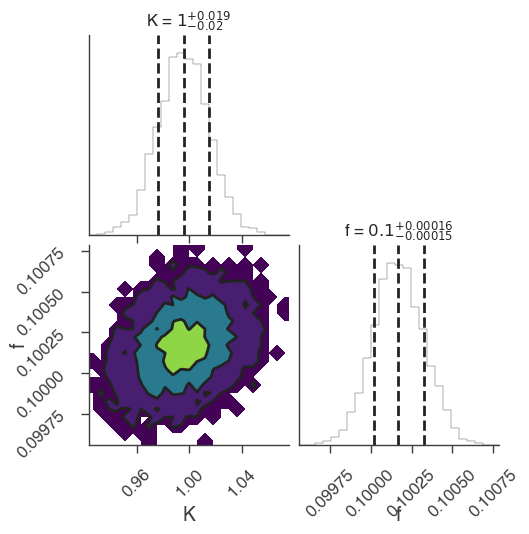

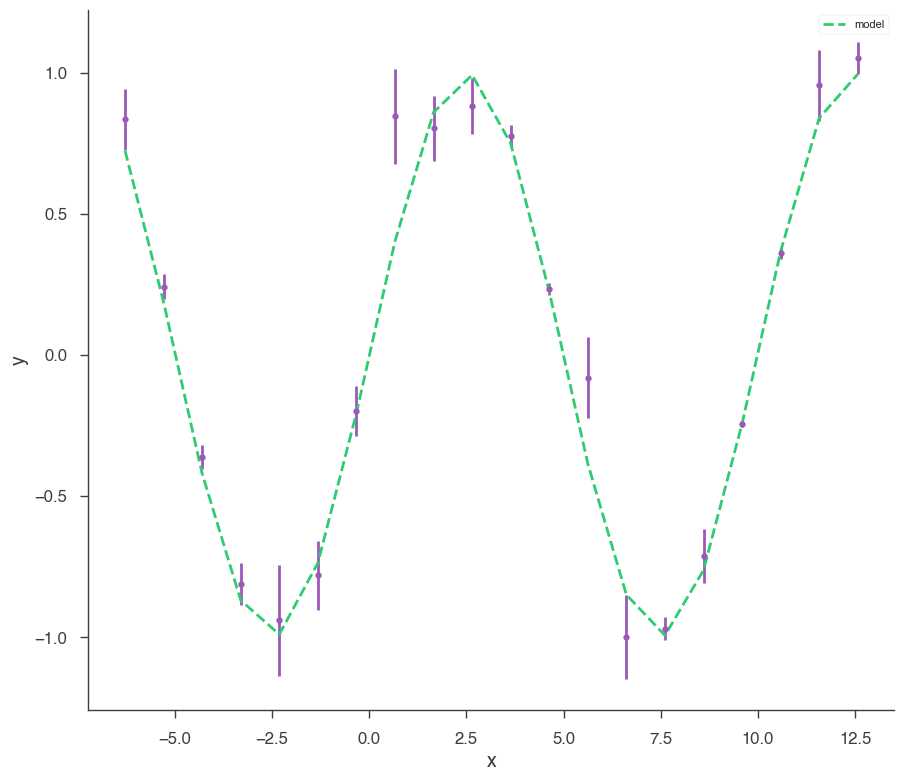

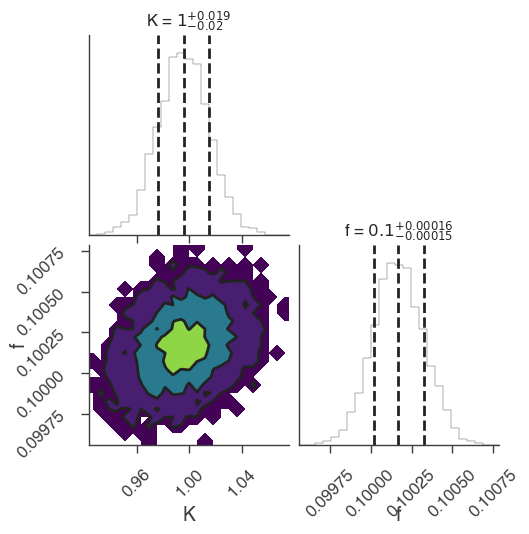

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=683569;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=931875;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:18, 32.94it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:20, 30.09it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:25, 24.18it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:24, 25.01it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:23, 25.36it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:26, 22.60it/s]

Sampling progress :   4%|▍         | 24/625 [00:01<00:28, 21.10it/s]

Sampling progress :   4%|▍         | 27/625 [00:01<00:26, 22.49it/s]

Sampling progress :   5%|▍         | 30/625 [00:01<00:27, 21.71it/s]

Sampling progress :   5%|▌         | 33/625 [00:01<00:27, 21.79it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:25, 23.06it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:24, 24.15it/s]

Sampling progress :   7%|▋         | 42/625 [00:01<00:23, 25.31it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:22, 25.81it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:22, 26.08it/s]

Sampling progress :   8%|▊         | 51/625 [00:02<00:21, 27.09it/s]

Sampling progress :   9%|▊         | 54/625 [00:02<00:21, 26.78it/s]

Sampling progress :   9%|▉         | 57/625 [00:02<00:21, 26.99it/s]

Sampling progress :  10%|▉         | 61/625 [00:02<00:20, 27.60it/s]

Sampling progress :  10%|█         | 65/625 [00:02<00:19, 28.72it/s]

Sampling progress :  11%|█         | 68/625 [00:02<00:19, 28.68it/s]

Sampling progress :  11%|█▏        | 71/625 [00:02<00:19, 29.03it/s]

Sampling progress :  12%|█▏        | 74/625 [00:02<00:19, 28.51it/s]

Sampling progress :  12%|█▏        | 77/625 [00:03<00:20, 26.70it/s]

Sampling progress :  13%|█▎        | 80/625 [00:03<00:20, 27.10it/s]

Sampling progress :  13%|█▎        | 84/625 [00:03<00:19, 28.26it/s]

Sampling progress :  14%|█▍        | 87/625 [00:03<00:18, 28.46it/s]

Sampling progress :  14%|█▍        | 90/625 [00:03<00:19, 27.35it/s]

Sampling progress :  15%|█▍        | 93/625 [00:03<00:19, 27.39it/s]

Sampling progress :  15%|█▌        | 96/625 [00:03<00:19, 27.35it/s]

Sampling progress :  16%|█▌        | 99/625 [00:03<00:18, 28.04it/s]

Sampling progress :  16%|█▋        | 102/625 [00:03<00:19, 26.64it/s]

Sampling progress :  17%|█▋        | 105/625 [00:04<00:19, 26.19it/s]

Sampling progress :  17%|█▋        | 109/625 [00:04<00:18, 27.88it/s]

Sampling progress :  18%|█▊        | 112/625 [00:04<00:18, 27.63it/s]

Sampling progress :  18%|█▊        | 115/625 [00:04<00:18, 27.68it/s]

Sampling progress :  19%|█▉        | 119/625 [00:04<00:17, 28.82it/s]

Sampling progress :  20%|█▉        | 122/625 [00:04<00:17, 28.99it/s]

Sampling progress :  20%|██        | 125/625 [00:04<00:17, 28.75it/s]

Sampling progress :  21%|██        | 129/625 [00:04<00:17, 28.96it/s]

Sampling progress :  21%|██        | 132/625 [00:04<00:17, 28.65it/s]

Sampling progress :  22%|██▏       | 135/625 [00:05<00:17, 28.16it/s]

Sampling progress :  22%|██▏       | 138/625 [00:05<00:18, 26.86it/s]

Sampling progress :  23%|██▎       | 142/625 [00:05<00:16, 29.33it/s]

Sampling progress :  23%|██▎       | 145/625 [00:05<00:16, 28.69it/s]

Sampling progress :  24%|██▎       | 148/625 [00:05<00:16, 28.57it/s]

Sampling progress :  24%|██▍       | 151/625 [00:05<00:16, 28.88it/s]

Sampling progress :  25%|██▍       | 154/625 [00:05<00:16, 28.86it/s]

Sampling progress :  25%|██▌       | 157/625 [00:05<00:16, 28.73it/s]

Sampling progress :  26%|██▌       | 161/625 [00:05<00:15, 30.48it/s]

Sampling progress :  26%|██▋       | 165/625 [00:06<00:15, 30.00it/s]

Sampling progress :  27%|██▋       | 168/625 [00:06<00:15, 29.69it/s]

Sampling progress :  27%|██▋       | 171/625 [00:06<00:15, 29.03it/s]

Sampling progress :  28%|██▊       | 174/625 [00:06<00:15, 29.29it/s]

Sampling progress :  28%|██▊       | 177/625 [00:06<00:15, 29.22it/s]

Sampling progress :  29%|██▉       | 181/625 [00:06<00:14, 29.94it/s]

Sampling progress :  30%|██▉       | 185/625 [00:06<00:14, 30.92it/s]

Sampling progress :  30%|███       | 189/625 [00:06<00:14, 31.08it/s]

Sampling progress :  31%|███       | 193/625 [00:07<00:15, 28.70it/s]

Sampling progress :  31%|███▏      | 196/625 [00:07<00:15, 28.60it/s]

Sampling progress :  32%|███▏      | 200/625 [00:07<00:14, 28.70it/s]

Sampling progress :  32%|███▏      | 203/625 [00:07<00:14, 28.87it/s]

Sampling progress :  33%|███▎      | 206/625 [00:07<00:14, 29.06it/s]

Sampling progress :  33%|███▎      | 209/625 [00:07<00:14, 29.03it/s]

Sampling progress :  34%|███▍      | 212/625 [00:07<00:14, 29.04it/s]

Sampling progress :  34%|███▍      | 215/625 [00:07<00:14, 28.94it/s]

Sampling progress :  35%|███▌      | 219/625 [00:07<00:13, 29.64it/s]

Sampling progress :  36%|███▌      | 222/625 [00:08<00:13, 29.21it/s]

Sampling progress :  36%|███▌      | 225/625 [00:08<00:13, 28.71it/s]

Sampling progress :  36%|███▋      | 228/625 [00:08<00:14, 28.34it/s]

Sampling progress :  37%|███▋      | 231/625 [00:08<00:13, 28.53it/s]

Sampling progress :  38%|███▊      | 235/625 [00:08<00:13, 29.60it/s]

Sampling progress :  38%|███▊      | 238/625 [00:08<00:13, 29.09it/s]

Sampling progress :  39%|███▊      | 241/625 [00:08<00:13, 28.68it/s]

Sampling progress :  39%|███▉      | 244/625 [00:08<00:13, 28.95it/s]

Sampling progress :  40%|███▉      | 247/625 [00:08<00:12, 29.13it/s]

Sampling progress :  40%|████      | 251/625 [00:09<00:13, 28.50it/s]

Sampling progress :  41%|████      | 254/625 [00:09<00:13, 27.02it/s]

Sampling progress :  41%|████      | 257/625 [00:09<00:13, 26.63it/s]

Sampling progress :  42%|████▏     | 260/625 [00:09<00:13, 27.37it/s]

Sampling progress :  42%|████▏     | 264/625 [00:09<00:12, 28.39it/s]

Sampling progress :  43%|████▎     | 268/625 [00:09<00:12, 28.83it/s]

Sampling progress :  43%|████▎     | 271/625 [00:09<00:12, 28.29it/s]

Sampling progress :  44%|████▍     | 274/625 [00:09<00:12, 28.42it/s]

Sampling progress :  44%|████▍     | 277/625 [00:09<00:12, 28.16it/s]

Sampling progress :  45%|████▍     | 280/625 [00:10<00:12, 27.06it/s]

Sampling progress :  45%|████▌     | 283/625 [00:10<00:13, 25.10it/s]

Sampling progress :  46%|████▌     | 287/625 [00:10<00:12, 27.07it/s]

Sampling progress :  46%|████▋     | 290/625 [00:10<00:12, 27.41it/s]

Sampling progress :  47%|████▋     | 294/625 [00:10<00:11, 28.93it/s]

Sampling progress :  48%|████▊     | 297/625 [00:10<00:11, 28.68it/s]

Sampling progress :  48%|████▊     | 300/625 [00:10<00:11, 28.55it/s]

Sampling progress :  48%|████▊     | 303/625 [00:10<00:11, 28.88it/s]

Sampling progress :  49%|████▉     | 306/625 [00:11<00:11, 28.93it/s]

Sampling progress :  50%|████▉     | 310/625 [00:11<00:10, 29.27it/s]

Sampling progress :  50%|█████     | 314/625 [00:11<00:10, 29.75it/s]

Sampling progress :  51%|█████     | 317/625 [00:11<00:10, 29.18it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:11<00:09, 31.20it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:11<00:10, 29.68it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:11<00:10, 29.39it/s]

Sampling progress :  53%|█████▎    | 332/625 [00:11<00:09, 31.04it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:12<00:09, 29.80it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:12<00:09, 29.55it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:12<00:09, 29.88it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:12<00:09, 30.16it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:12<00:08, 31.16it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:12<00:09, 29.81it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:12<00:08, 29.97it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:12<00:09, 28.87it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:13<00:08, 29.62it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:13<00:08, 29.55it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:13<00:08, 28.55it/s]

Sampling progress :  60%|██████    | 377/625 [00:13<00:08, 28.64it/s]

Sampling progress :  61%|██████    | 380/625 [00:13<00:08, 28.25it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:13<00:08, 28.79it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:13<00:08, 28.85it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:13<00:08, 28.76it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:13<00:08, 28.14it/s]

Sampling progress :  63%|██████▎   | 396/625 [00:14<00:08, 27.36it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:14<00:08, 26.71it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:14<00:08, 27.38it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:14<00:07, 27.82it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:14<00:08, 26.42it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:14<00:07, 27.38it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:14<00:07, 27.83it/s]

Sampling progress :  67%|██████▋   | 417/625 [00:14<00:07, 28.37it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:14<00:07, 29.05it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:15<00:06, 29.75it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:15<00:06, 29.86it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:15<00:06, 29.98it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:15<00:06, 30.40it/s]

Sampling progress :  71%|███████   | 441/625 [00:15<00:06, 29.00it/s]

Sampling progress :  71%|███████   | 445/625 [00:15<00:06, 29.56it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:15<00:06, 28.65it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:16<00:06, 28.01it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:16<00:06, 28.35it/s]

Sampling progress :  73%|███████▎  | 457/625 [00:16<00:06, 27.94it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:16<00:05, 28.72it/s]

Sampling progress :  74%|███████▍  | 464/625 [00:16<00:05, 28.47it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:16<00:05, 27.59it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:16<00:05, 28.73it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:16<00:05, 28.36it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:16<00:05, 28.30it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:17<00:05, 28.00it/s]

Sampling progress :  77%|███████▋  | 484/625 [00:17<00:04, 28.87it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:17<00:04, 28.37it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:17<00:04, 28.49it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:17<00:04, 28.84it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:17<00:04, 29.10it/s]

Sampling progress :  80%|████████  | 500/625 [00:17<00:04, 28.78it/s]

Sampling progress :  80%|████████  | 503/625 [00:17<00:04, 29.02it/s]

Sampling progress :  81%|████████  | 507/625 [00:17<00:04, 28.62it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:18<00:03, 29.23it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:18<00:03, 28.69it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:18<00:03, 28.06it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:18<00:03, 27.17it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:18<00:03, 27.04it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:18<00:03, 27.78it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:18<00:03, 25.27it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:18<00:03, 25.64it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:19<00:03, 25.97it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:19<00:03, 26.64it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:19<00:03, 27.13it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:19<00:02, 27.40it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:19<00:02, 26.21it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:19<00:02, 25.98it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:19<00:02, 27.13it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:19<00:02, 27.30it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:20<00:02, 28.53it/s]

Sampling progress :  90%|█████████ | 565/625 [00:20<00:02, 28.83it/s]

Sampling progress :  91%|█████████ | 569/625 [00:20<00:01, 30.40it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:20<00:01, 29.55it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:20<00:01, 29.89it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:20<00:01, 30.36it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:20<00:01, 29.79it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:20<00:01, 30.11it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:21<00:01, 29.86it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:21<00:00, 30.28it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:21<00:00, 29.04it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:21<00:00, 28.81it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:21<00:00, 28.58it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:21<00:00, 29.18it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:21<00:00, 29.15it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:21<00:00, 28.29it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:22<00:00, 29.22it/s]

Sampling progress : 100%|██████████| 625/625 [00:22<00:00, 27.83it/s]

Sampling progress : 100%|██████████| 625/625 [00:22<00:00, 28.20it/s]

18:56:57 INFO      fit restored to maximum of posterior                                         ]8;id=833402;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=104157;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=969996;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=468732;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 32


Scale Factor: 0.65625


Mean Integrated Autocorrelation Time: 209.15


Effective Sample Size: 59.77


Number of Log Probability Evaluations: 80968


Effective Samples per Log Probability Evaluation: 0.000738


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.96 -0.24 +0.17) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0017 -0.0019 +0.0015) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.201462
total       -11.201462

Values of statistical measures:

statistical measures
AIC              27.108807
BIC              28.394389
DIC             207.304497
PDIC              2.660694

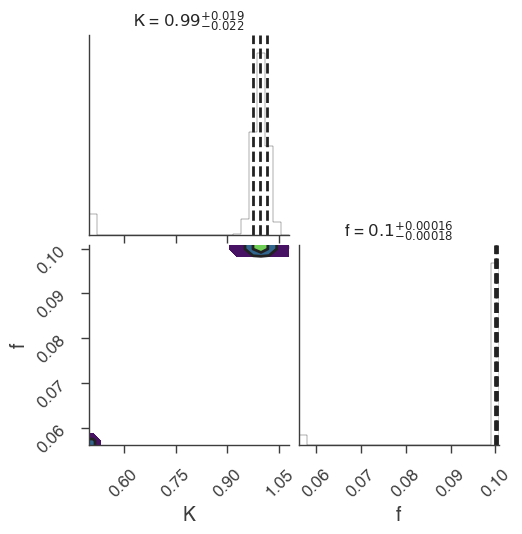

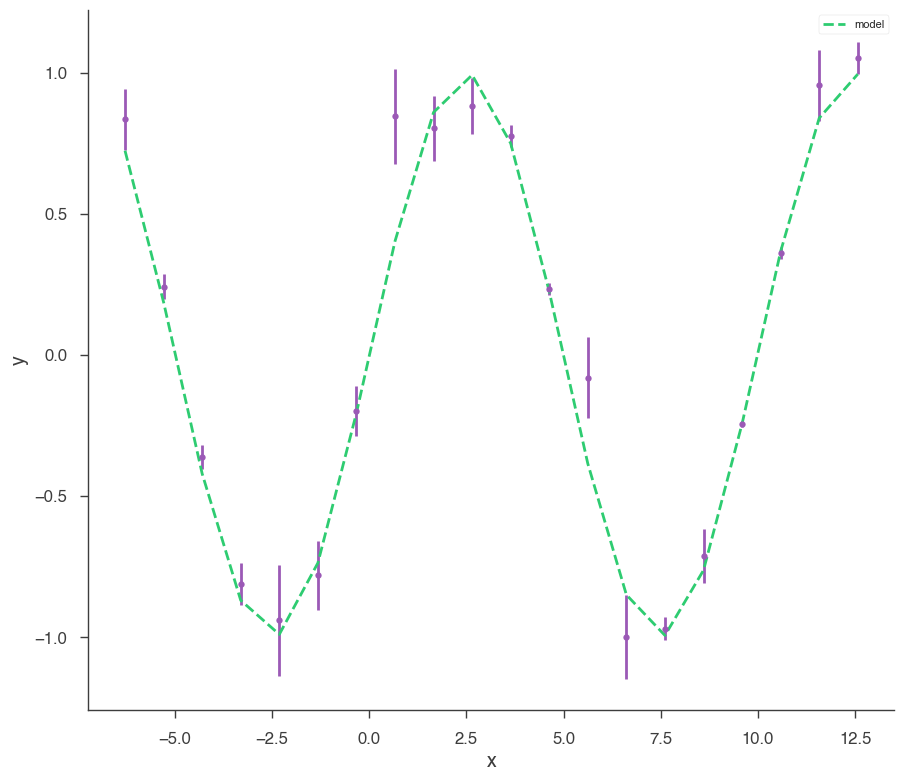

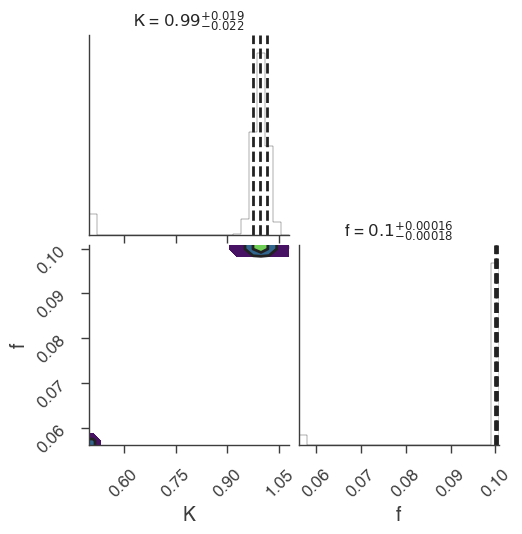

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

         INFO      sampler set to ultranest                                                ]8;id=21634;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=733860;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 15272


[ultranest]   logZ = -21.34 +- 0.09952


[ultranest] Effective samples strategy satisfied (ESS = 981.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


18:57:11 INFO      fit restored to maximum of posterior                                         ]8;id=24973;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=834702;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=752865;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=176498;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.97 -0.20 +0.18) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0016 -0.0014 +0.0016) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.203462
total       -11.203462

Values of statistical measures:

statistical measures
AIC                27.112806
BIC                28.398388
DIC                26.318979
PDIC                1.957835
log(Z)             -9.266133

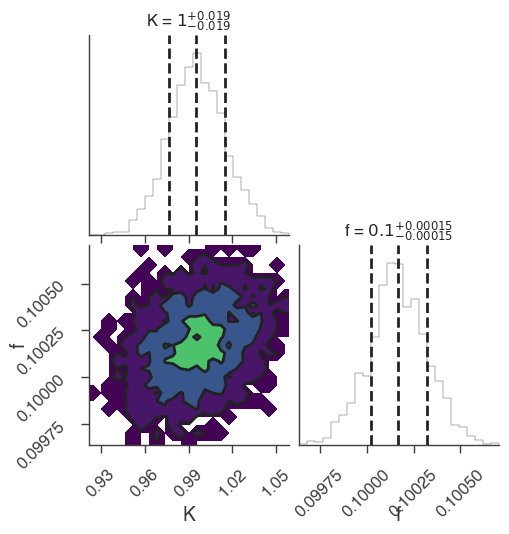

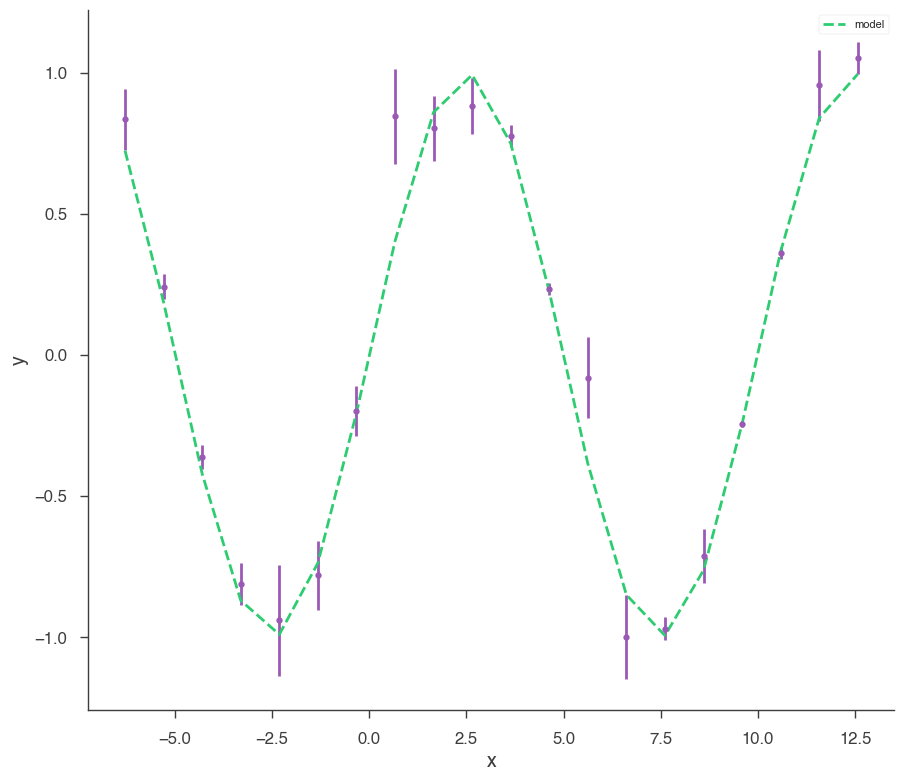

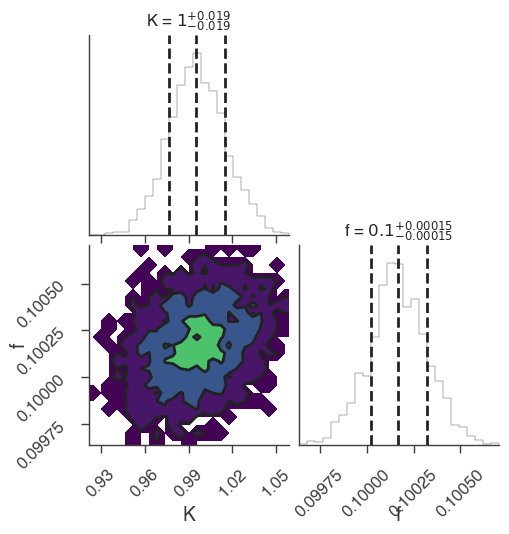

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()